### 自訂圖表的圖例
- 讓圖表透露出更多訊息，幫助資料科學家、利益相關者了解資料。

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

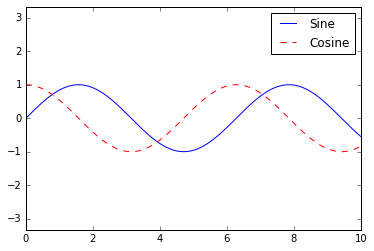

In [2]:
# 最簡單的圖例可以透過plt.legend。

%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()   # default rows=1, cols=1

ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

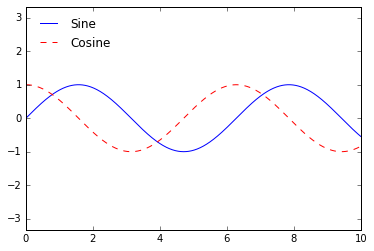

In [3]:
# 自訂圖例: 指定位置、關閉格線等等，有多種功能

ax.legend(loc='upper left', frameon=False)
fig

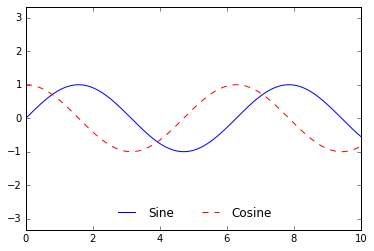

In [4]:
# 使用ncol參數指定圖例的欄位數

ax.legend(frameon=False, loc='lower center',   ncol=2)
fig

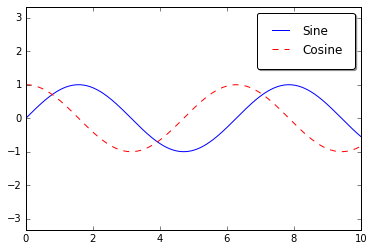

In [5]:
# 圖例更細緻, 但顯得有些不需要

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

#### 選取圖例所要使用的元素

[<matplotlib.lines.Line2D object at 0x000001C3B2A8AA58>, <matplotlib.lines.Line2D object at 0x000001C3B2A8ABA8>, <matplotlib.lines.Line2D object at 0x000001C3B2A8ACF8>, <matplotlib.lines.Line2D object at 0x000001C3B2A8AE48>]


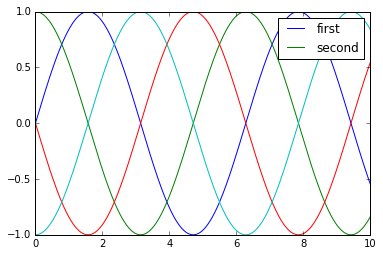

In [14]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))  # broadcasting
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
print(lines)

plt.legend(lines[:2], ['first', 'second'])

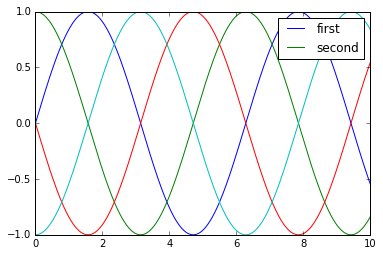

In [16]:
# 用一個個標示也可以。

plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True)

### 在圖例中的資料點大小
- 有時候圖例的預設值不夠用，如點的大小，可能因為面積、大小等等需要去標示得更清楚。
- [資料](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/data/california_cities.csv)

In [19]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

Text(0.5, 1.0, 'California Cities: Area and Population')

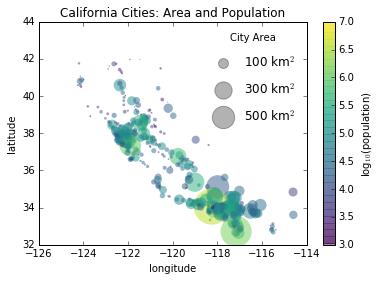

In [22]:
# 取出我們感興趣的資料
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 使用大小和顏色，但沒有標籤，畫上這些點
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 以下建立一個圖例: 畫上一個有我們想要的大小以及標籤的空串列
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population')

### 多重圖例
- 沒有簡單方法，需要透過建立新的artist圖例, 手動低階的加入的ax.add_artist()

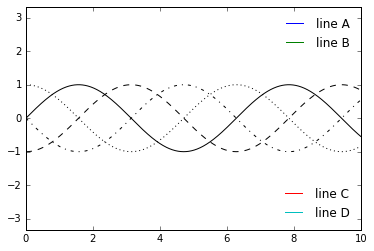

In [23]:
fig, ax = plt.subplots()

styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x-i*np.pi/2), styles[i], color='black')

ax.axis('equal')

# 指定第一個圖例
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# 建立第二個
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)

# 重點
ax.add_artist(leg)

## 多重子圖表
- #### 有時候將一些圖表放在一起比較是對資料比較好理解的
- #### plt.axes: 手動建立子圖表


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

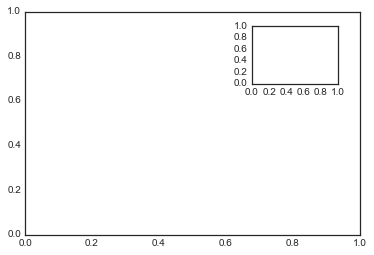

In [25]:
# plt.axes: 手動建立子圖表
# 建立一個axes最基本的方法是使用: plt.axes。但預測會塗滿整張figure。
# 可以透過傳入4個數字的list參數, [bottom, left, width, height]:  0~1

ax1 = plt.axes()  # 標準axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

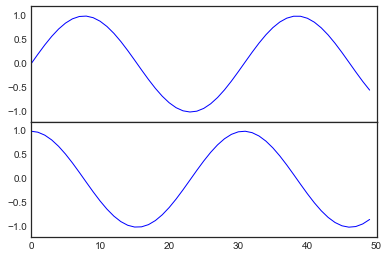

In [29]:
# 物件導向方式: fig.add_axes()

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

## plt.subplot: 子圖表的簡單網格
- 更簡單可以完成上面的例子。
- 網格模式, 只要指定好row, col就可以得到子圖。

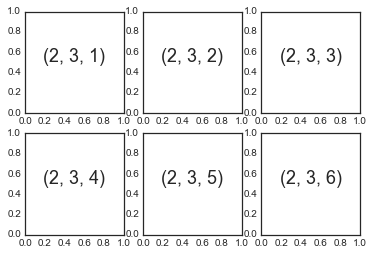

In [30]:
for i in range(1, 7):
    plt.subplot(2, 3, i)   # row=2, col=3, curr_index=i
    plt.text(0.5, 0.5, str((2, 3, i)),  fontsize=18, ha='center')

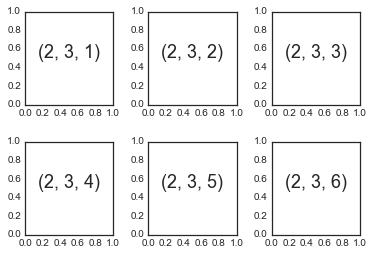

In [32]:
# plt.subplots_adjust: 用來調整這些子圖表中間的間隙, 等價於 fig.add_subplot()

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

## plt.subplots: 一次準備好整個網格
- 方便的函數

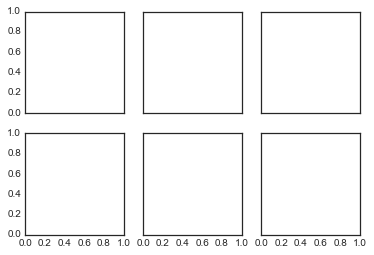

In [33]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

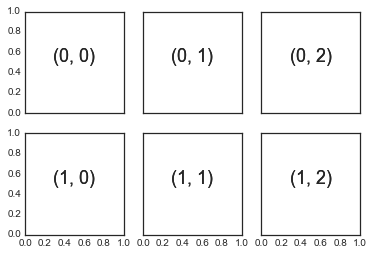

In [35]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')

fig

## plt.GridSpec: 多列多欄工具
- [參考](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py)

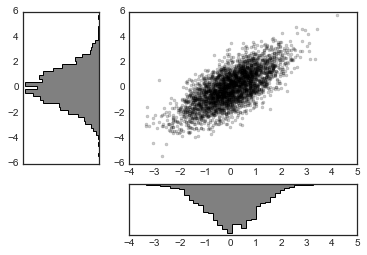

In [47]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

fig = plt.figure()
grid = plt.GridSpec(2, 2, width_ratios=(1, 3), height_ratios=(3, 1))
main_ax = fig.add_subplot(grid[0, 1])
y_hist = fig.add_subplot(grid[0, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[1, 1], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical',  color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()